<a href="https://colab.research.google.com/github/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Importing all the important Librarys and Data set

In [1]:
pip install texthero -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 7.0 MB/s 
     |████████████████████████████████| 235 kB 26.2 MB/s 
     |████████████████████████████████| 1.0 MB 49.3 MB/s 
     |████████████████████████████████| 184 kB 41.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.3
    Uninstalling srsly-2.4.3:
      Successfully uninstalled srsly-2.4.3
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.7
    Uninstalling catalogue-2.0.7:
      Successfully uninstalled catalogue-2.0.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1
ERROR: pip's dependency resolver does not currently take i

In [2]:
!pip install spacy -U
!python -m spacy info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 5.2 MB/s 
     |████████████████████████████████| 660 kB 38.6 MB/s 
     |████████████████████████████████| 457 kB 72.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [3]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [5]:
#importing all the important librarys
import pandas as pd
import numpy as np

#Importing library for data visualisation 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud

import math
import time
import re

# Importing Library to calculate Mean mode and median. 

from statistics import mean
from statistics import median
from statistics import mode

# Natural Language Tool Kit
import nltk.sentiment.vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

import nltk
nltk.download('stopwords')
import nltk.sentiment.vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

from nltk. tokenize import word_tokenize, RegexpTokenizer 
from nltk.corpus import stopwords 
tokenizer= RegexpTokenizer (r"\w+")

# Importing library for clustrring.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Importing Library to map the 
import folium



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

In [7]:
# Mounting the Google Drive folders to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
meta_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Zomato%20Restaurant%20reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [9]:
# to get the first five rows of the data set 
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [10]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [12]:
# to get the description of the data
meta_df.describe().transpose()

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [13]:
#checking for duplicate entries
print('duplicates in entries = ',len(meta_df)-len(meta_df.drop_duplicates()))
print('duplicates in Restaurant Name = ',len(meta_df['Name'])-len(meta_df['Name'].drop_duplicates()))

duplicates in entries =  0
duplicates in Restaurant Name =  0


**Web Scraping**

There is a column with links to the zomato resturaunt of which the data is given. [Here ](https://colab.research.google.com/drive/1_l92E1d286rR8IJs3kzvq_TZy5wIOGV4#scrollTo=xwxi9maFzvg_) we will scrape data from zomato and update our meta data. 


In [14]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file

meta_df = pd.read_csv('https://raw.githubusercontent.com/NaithaniAR/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/new_meta.csv')

In [15]:
meta_df = meta_df.drop(['Unnamed: 0'], axis =1)

## Reviews

In [16]:
# to get the first five rows of the data set 
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [17]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [18]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

## Data Cleaning  

Defined Functions 


In [19]:
'''
/// ***Note***///
Row_lis function are functions which are used to Extract elements from a coloumn of the Dataframe,
variations in row_lis are mainly to tackel diffrent cases which occure in the given data-set. 

'''

def Row_lis(DataFrame,Column_name):
  a= [Column_name] 
  master_list = DataFrame[a[0]].str.split(', ') #split the list into names
  my_list = [] #create an empty list
  for names in master_list: # for any names in master_list
    for C_name in names: # for any name in names
     my_list.append(C_name)   
  Elements=my_list
  print('List size:', len(Elements) )
  Elements = pd.DataFrame(Elements, columns = [a])
  
  return Elements,my_list


'__________________________________________________________________________________________________________________________________________'


def Row_lis2(DataFrame,Column_name):
 '''
 Convert a Row in a data frame into a list of unique elements 
 '''
 a = [Column_name]
 #Dropping na values from the dataframe 
 non_na= DataFrame.dropna()
 # Getting values into a list  
 arr = non_na[a].to_numpy()
 '''
 Reducing the dimensionality of a list 
 '''
 flat_ls = []
 for i in arr:
  for j in i:
   flat_ls.append(j)
 '''
 Spliting the remaing strings 
 '''
 mylis=[s.strip() for sub in flat_ls for s in sub.split(', ') if s]

 Elements=mylis
 print('List size:', len(Elements) )
 Elements = pd.DataFrame(Elements, columns = [a])

 return Elements,mylis

'__________________________________________________________________________________________________________________________________________'


def Row_lis3(DataFrame,Column_name):
 '''
 Convert a Row in a data frame into a list of unique elements 
 '''
 a = [Column_name]

 '''
 Getting values into a Srting
 '''
 x=0
 Elements=''
 for x in range(0,len(meta_df)):
  b= str(meta_df.iloc[x][9]).replace('[','').replace(']','').replace('\'','').replace('\"','')
  Elements=Elements + b
  x+=1
 '''
 Spliting the remaing strings 
 '''
 mylis= Elements.split(', ')
 mylis= Elements.split(' , ')
 mylis= Elements.split(' ,')
 mylis= Elements.split(',')

 Elements = mylis

 print('List size:', len(Elements) )

 '''
 Converting the list into Pandas dataframe.
 '''
 Elements = pd.DataFrame(Elements, columns = [a])

 return Elements,mylis

'__________________________________________________________________________________________________________________________________________'


'''''
Unique list 
'''''

def unique_list(input_list):
     output_list = []
     for word in input_list:
         if word not in input_list:
            output_list = [word]
            return output_list

'''
  This function takes a dictionary of mapping with keys as the charecters to be replaced in a string and
  the values as the characters to be replaced with
'''

def multiple_str_replaces(org_str,maps):

 for l,r in maps.items():
   org_str = org_str.replace(l,r)
   return org_str
'''
  This function takes a list of strings, removes special characters and give an output of a clean string 

'''

'__________________________________________________________________________________________________________________________________________'


def clean_str(input_string):
  '''
  First lets form a sentance.
  '''
  sentence = " ".join(b)
  sentence
  '''
  Dropping special characters 
  '''
  line = re.sub('[!@#$-]', '', sentence)

  return line

'__________________________________________________________________________________________________________________________________________'


def cld(b):
 '''
 First lets form a sentance from the string 
 '''
 sentence = " ".join(b)
 sentence
 '''
 Dropping special characters 
 '''
 line = re.sub('[!@#$-]', '', sentence)
 '''
 Printing word coud 
 '''
 plt.figure(figsize=(15,8))
 # Creating word_cloud with text as argument in .generate() method
 word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color ='black').generate(line)
 # Display the generated Word Cloud
 plt.imshow(word_cloud, interpolation='bilinear')
 plt.axis("off")
 return plt



## Meta Data 

Let us first explore the names of the column 

In [20]:
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'additional_services', 'Has_Featured',
       'known_for', 'status', 'Popular_Dishes'],
      dtype='object')

Q. Explore the names, find the most occuring trend while  naming
 a resturaunt. 

In [21]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis(meta_df,'Name')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

List size: 106


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

India is famous for itys street food, since the geographic location of the resturants is near many college campusus as seen above here, we can see its reflection on the word cloud. 

Kitchen , Hotel and Express services are availabe in the area. 

Q. Arrange the resturants in the df wrt. cost of one person.

In [22]:
# Changing the Data Type of the 'Cost'
#If generating error restart and run all

meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [23]:
meta_df.sort_values(by='Cost',ascending=False,inplace=True)


In [24]:
meta_df.reset_index(inplace=True)

In [25]:
meta_df[['Cost', 'Name', 'Popular_Dishes']]

Cost                                               Name  \
0    2800               Collage - Hyatt Hyderabad Gachibowli   
1    2500                   Feast - Sheraton Hyderabad Hotel   
2    1900  Jonathan's Kitchen - Holiday Inn Express & Suites   
3    1900                                  10 Downing Street   
4    1800            Cascade - Radisson Hyderabad Hitec City   
..    ...                                                ...   
100   200                                      Momos Delight   
101   200                                 Hunger Maggi Point   
102   200                                       Sweet Basket   
103   150                                Mohammedia Shawarma   
104   150                                               Amul   

                                        Popular_Dishes  
0    Sushi, Sunday Brunch, Pancakes, Salads, Desert...  
1    Sushi, Dal Makhni, Pastries, Mocktails, Cheese...  
2    Focaccia Al Pollo, Involtini Di Pollo, Jumbo P...  
3    Chicken Burritos, Wheat Beer, Brewed Beer, Chi...  
4    Croissant, Dinner Buffet, Sunday Brunch, Deser...  
..                                                 ...  
100                                                NaN  
101                                                NaN  
102  Barfi, Bengali Sweets, Raj Kachori, Jalebi, Pa...  
103                                                NaN  
104  Death by Chocolate, Thick Shakes, Icecream, Br...  

[105 rows x 3 columns]

Five most Expensive resturaunts in the df. 
1.             Collage - Hyatt Hyderabad Gachibowli

2.             Feast - Sheraton Hyderabad Hotel	

3.   Jonathan's Kitchen - Holiday Inn Express & Suites

4.                    10 Downing Street

5.                Cascade - Radisson Hyderabad Hitec City	


Cheapest resturaunts in the df
1.                                    Mohammedia Shawarma
2.                                                  Amul
3.                                         Hunger Maggi Point
4.                                          Sweet Basket
5.                                              Momos Delight	

Q. Explore the Collections column

List size: 99


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

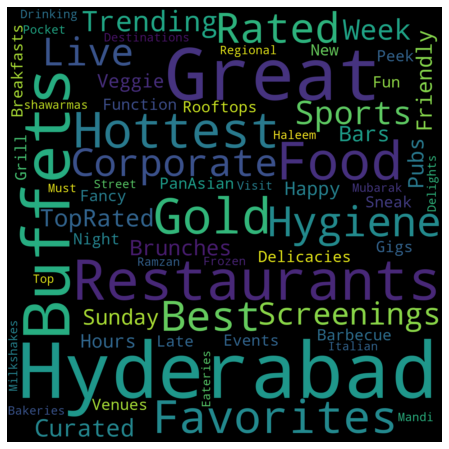

In [26]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Collections')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

In [27]:
a.value_counts()[:5]

(Collections,)                             
Great Buffets                                  11
Hyderabad's Hottest                             7
Food Hygiene Rated Restaurants in Hyderabad     7
Corporate Favorites                             6
Live Sports Screenings                          6
dtype: int64

Q. Explore the Collections known_for

In [28]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 
a,b=Row_lis2(meta_df,'known_for')
'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

List size: 276


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [29]:
known_for=b

In [30]:
a.value_counts()[:5]

(known_for,)         
Beautiful View           5
Ample Seating Area       4
Worth the Price          4
Good for Large Groups    4
Rooftop Ambience         4
dtype: int64

 Q. Explore the Collections Cuisines

List size: 313


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

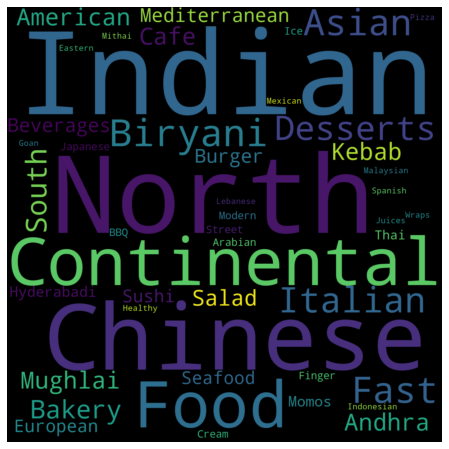

In [31]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis(meta_df,'Cuisines')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

In [32]:
Cuisines =b

In [33]:
a.value_counts()[:5]

(Cuisines,) 
North Indian    61
Chinese         43
Continental     21
Biryani         16
Asian           15
dtype: int64

Q. Exploring Time Column 

In [34]:
meta_df['Timings']

0                                     24 Hours (Mon-Sun)
1      6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm...
2                        11:30 AM to 3 PM, 7 PM to 11 PM
3                                 12 Noon to 12 Midnight
4                                               24 Hours
                             ...                        
100                                 6pm to 2am (Mon-Sun)
101                                   4:30 PM to 5:30 AM
102    10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...
103                                         1 PM to 1 AM
104                                        10 AM to 5 AM
Name: Timings, Length: 105, dtype: object

We will drop this column as there is very little variation and most resturaunts follow a similar trend. 

Q. What are the most comman services offered by the resturants ? 

In [35]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis3(meta_df,'additional_services')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)


List size: 457


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [36]:
a.value_counts()[:5]

(additional_services,)    
 Takeaway Available           66
 Indoor Seating               47
 Table booking recommended    23
 Full Bar Available           21
 Valet Parking Available      21
dtype: int64

 **The most recurring features in the resturaunt are**
 
 Takeaway Available               
 Indoor Seating                   
 Table booking recommended        
 Valet Parking Available          
 Full Bar Available              

Q. What is the count of featured resturaunts in the DataFrame

In [37]:
meta_df['Has_Featured'].value_counts()


0.00    79
1.00    26
Name: Has_Featured, dtype: int64

Q. How many resturaunts have closed for business? 

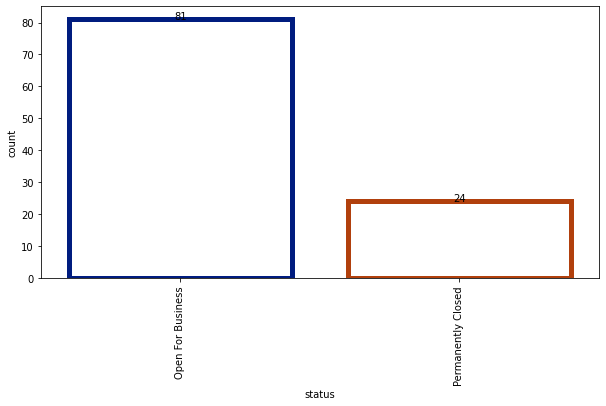

In [38]:
meta_df['status'].value_counts()
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(x="status", data=meta_df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        meta_df['status'].value_counts()[i],ha="center")
    i += 1

Q. What are the total number of unique popular dishes which are served ?

List size: 268


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

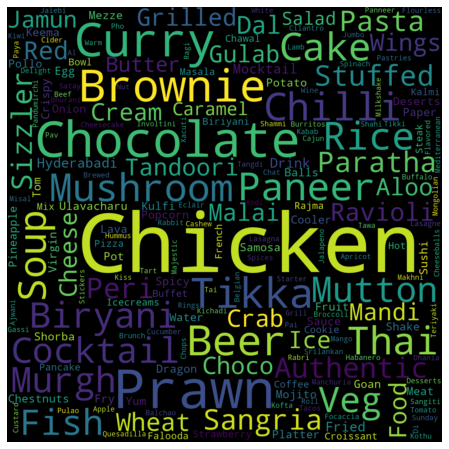

In [39]:
'''
Converting list of stings, list of lists into a more workable format. Ref defined function for more working. 
''' 

a,b=Row_lis2(meta_df,'Popular_Dishes')

'''
Printing Word cloud for names of the resturaunt 
'''
cld(b)

In [40]:
Popular_Dishes = b

## Reviews 

In [41]:
reviews_df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

Q. How many reviews for each resturaunt are available ? 



In [42]:
reviews_df['Restaurant'].value_counts()

Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Restaurant, Length: 100, dtype: int64

We can conclude that we have 100 reviews of 100 diffrent resturaunts. 

Q. Explore rows with nun values 

In [43]:
'''
Rows in which there are more than two null values 
'''

x= reviews_df.iloc[reviews_df[(reviews_df.isnull().sum(axis=1) >= 2)].index]

'''Storing index of this df'''
y= x.index

reviews_df.iloc[reviews_df[(reviews_df.isnull().sum(axis=1) >= 2)].index]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9085         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

We see that all values in these rows are null hence we will drop these rows. 

In [44]:
reviews_df.drop(y, inplace = True)

Exploring Time.

In [45]:
#Splitting time into various columns. 

'''
comverting time to DateTime format
'''
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])

'''
Creating new columns based on DateTime
'''

reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

'''
Dropping time column 
'''
reviews_df = reviews_df.drop(['Time'], axis =1)

In [46]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64


Q. Which resturaunt had the maximum and minimum rating in 2019

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


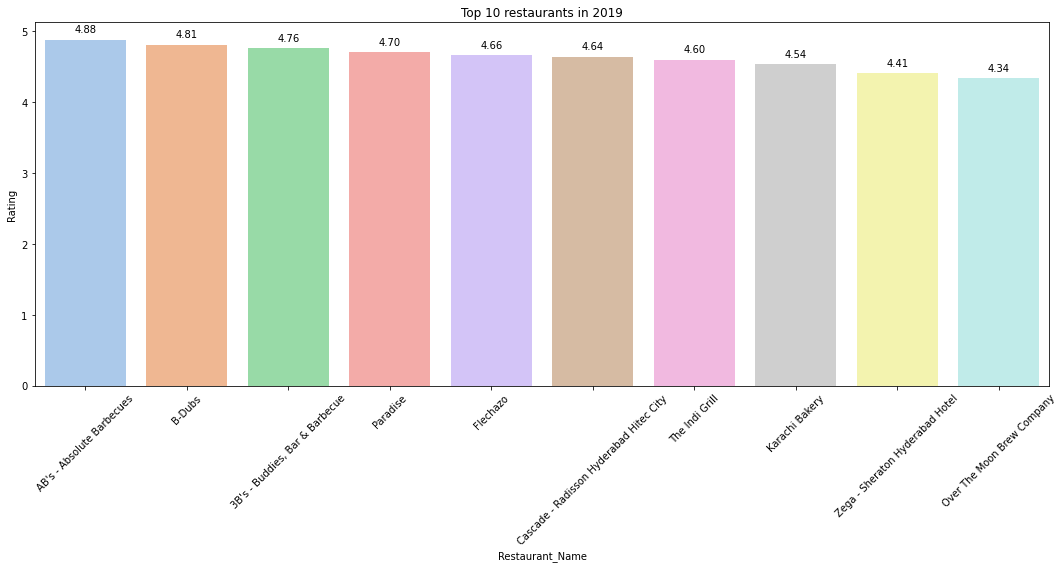

In [47]:
#Maxmimum 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = 4.1          # Making the dat uniform 
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')    # Ref. cells below 
'''
First lets groupby wrt. year and find the mean rating of resturaunts 
'''

yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

'''
PLot them in graph to visualise 
'''

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

In [48]:
reviews_df['Rating'].value_counts()

5.00    3832
4.00    2373
1.00    1735
3.00    1193
2.00     684
4.50      69
3.50      47
2.50      19
1.50       9
4.10       1
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


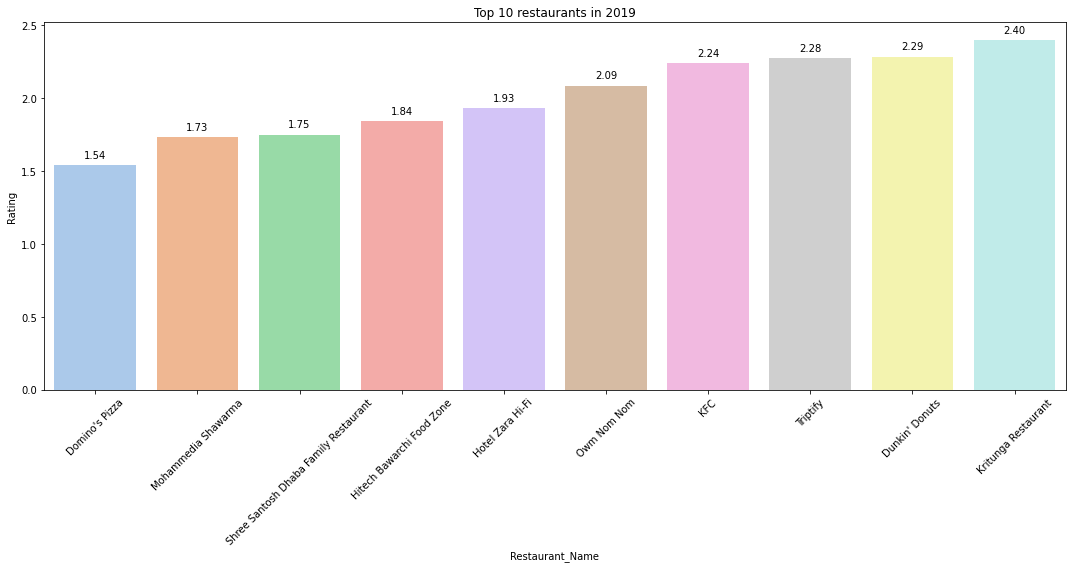

In [49]:
#Maxmimum 

'''
First lets groupby wrt. year and find the mean rating of resturaunts 
'''

yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = True).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

'''
PLot them in graph to visualise 
'''

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

Q. Explore Ratings

In [50]:
reviews_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 4.1])

In [51]:
'''
Ratings column contains values 'Like' we will impute this value with Np.nan
'''

reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan

'''
Converting the ratings column into float type 
'''

reviews_df['Rating'] = reviews_df['Rating'].astype('float64')


Returants with top mean ratings 


Text(0.5, 1.0, 'Top Rated 10 Restaurants')

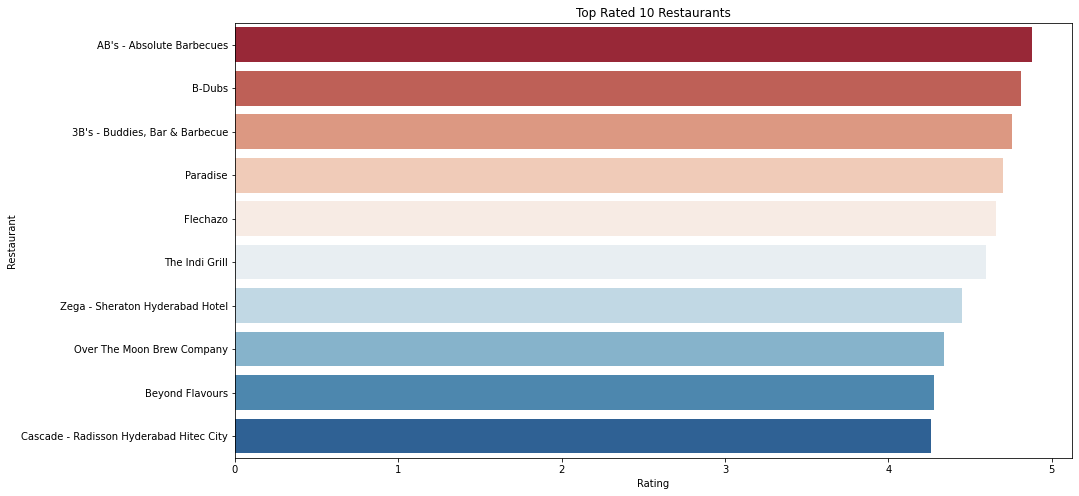

In [52]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
df_rating = df_rating.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(data=df_rating, x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated 10 Restaurants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


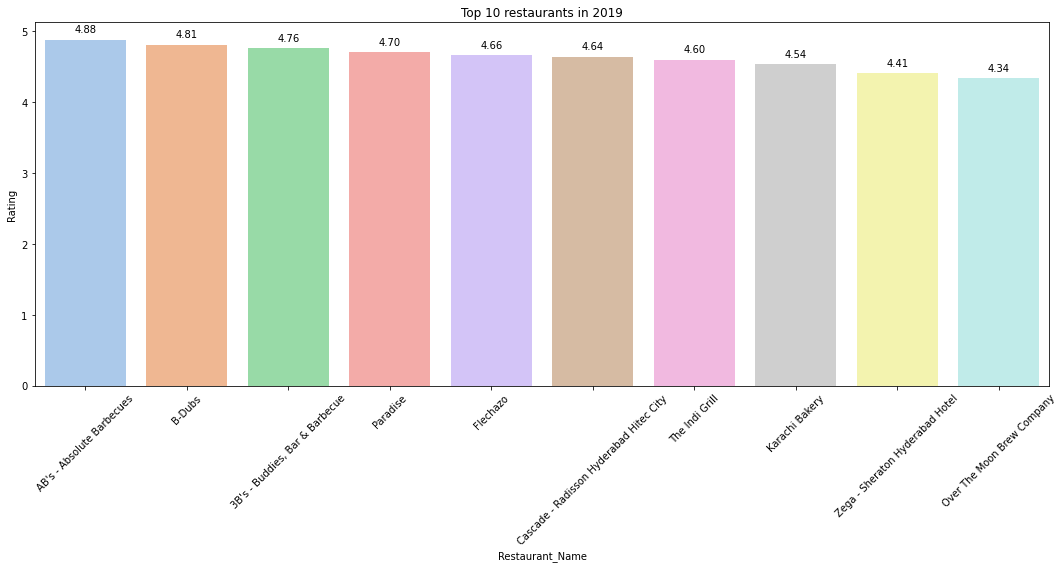

In [53]:
yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

Q. 
Exploring meta data. 

In [54]:
reviews_df['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 9962, dtype: object

In [55]:
'''
Splitting MetaData into Followers and reviews 
'''

reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str

'''
Conveting the newly created columns into Followers and Reviews 
'''
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

'''
Dropping the Reviews Column 
'''

reviews_df = reviews_df.drop(['Metadata'], axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


Imputing the values with zero as it is quite possible that the user has no followers and zero reviews 

In [56]:
reviews_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 4.1])

In [57]:
''' Imputing nan values with 0 '''

reviews_df.loc[reviews_df['Reviews'].isna()] = 0

reviews_df.loc[reviews_df['Followers'].isna()] = 0

In [58]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  Pictures  \
0     The ambience was good, food was quite good . h...    5.00      0.00   
1     Ambience is too good for a pleasant evening. S...    5.00      0.00   
2     A must try.. great food great ambience. Thnx f...    5.00      0.00   
3     Soumen das and Arun was a great guy. Only beca...    5.00      0.00   
4     Food is good.we ordered Kodi drumsticks and ba...    5.00      0.00   
...                                                 ...     ...       ...   
9995  Madhumathi Mahajan Well to start with nice cou...    3.00      0.00   
9996  This place has never disappointed us.. The foo...    4.50      0.00   
9997  Bad rating is mainly because of "Chicken Bone ...    1.50      3.00   
9998  I personally love and prefer Chinese Food. Had...    4.00      0.00   
9999  Checked in here to try some delicious chinese ...    3.50      6.00   

        Year  Month  Hour  Reviews  Followers  
0    2019.00   5.00 15.00     1.00       2.00  
1    2019.00   5.00 14.00     3.00       2.00  
2    2019.00   5.00 22.00     2.00       3.00  
3    2019.00   5.00 22.00     1.00       1.00  
4    2019.00   5.00 21.00     3.00       2.00  
...      ...    ...   ...      ...        ...  
9995 2016.00   6.00  0.00    53.00      54.00  
9996 2016.00   6.00 22.00     2.00      53.00  
9997 2016.00   6.00 10.00    65.00     423.00  
9998 2016.00   5.00 17.00    13.00     144.00  
9999 2016.00   5.00 16.00   472.00    1302.00  

[9962 rows x 10 columns]

In [59]:
meta_df

index                                               Name  \
0       92               Collage - Hyatt Hyderabad Gachibowli   
1       56                   Feast - Sheraton Hyderabad Hotel   
2       21  Jonathan's Kitchen - Holiday Inn Express & Suites   
3       18                                  10 Downing Street   
4       91            Cascade - Radisson Hyderabad Hitec City   
..     ...                                                ...   
100     85                                      Momos Delight   
101     29                                 Hunger Maggi Point   
102    101                                       Sweet Basket   
103     89                                Mohammedia Shawarma   
104     23                                               Amul   

                                                 Links  Cost  \
0    https://www.zomato.com/hyderabad/collage-hyatt...  2800   
1    https://www.zomato.com/hyderabad/feast-sherato...  2500   
2    https://www.zomato.com/hyderabad/jonathans-kit...  1900   
3    https://www.zomato.com/hyderabad/10-downing-st...  1900   
4    https://www.zomato.com/hyderabad/cascade-radis...  1800   
..                                                 ...   ...   
100  https://www.zomato.com/hyderabad/momos-delight...   200   
101  https://www.zomato.com/hyderabad/hunger-maggi-...   200   
102  https://www.zomato.com/hyderabad/sweet-basket-...   200   
103  https://www.zomato.com/hyderabad/mohammedia-sh...   150   
104   https://www.zomato.com/hyderabad/amul-gachibowli   150   

                                           Collections  \
0                                      Sunday Brunches   
1    Sunday Brunches, Great Breakfasts, Function Ve...   
2                       Great Italian, Sunday Brunches   
3                                   Trending This Week   
4                                                  NaN   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                                                NaN   

                                              Cuisines  \
0    Continental, Italian, North Indian, Chinese, A...   
1           Modern Indian, Asian, Continental, Italian   
2        North Indian, Japanese, Italian, Salad, Sushi   
3                   North Indian, Chinese, Continental   
4            North Indian, Italian, Continental, Asian   
..                                                 ...   
100                                              Momos   
101                                          Fast Food   
102                                     Bakery, Mithai   
103                               Street Food, Arabian   
104                                Ice Cream, Desserts   

                                               Timings  latitude  longitude  \
0                                   24 Hours (Mon-Sun)     17.42      78.34   
1    6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm...     17.42      78.34   
2                      11:30 AM to 3 PM, 7 PM to 11 PM     17.42      78.35   
3                               12 Noon to 12 Midnight     17.45      78.36   
4                                             24 Hours     17.45      78.36   
..                                                 ...       ...        ...   
100                               6pm to 2am (Mon-Sun)     17.45      78.36   
101                                 4:30 PM to 5:30 AM     17.45      78.36   
102  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...     17.43      78.37   
103                                       1 PM to 1 AM     17.45      78.35   
104                                      10 AM to 5 AM     17.45      78.36   

                                   additional_services  Has_Featured  \
0    ['Breakfast', 'Home Delivery', 'Tak

# Exploratory Data Analysis 

In [60]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Pictures', 'Year',
       'Month', 'Hour', 'Reviews', 'Followers'],
      dtype='object')

In [61]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'additional_services', 'Has_Featured',
       'known_for', 'status', 'Popular_Dishes'],
      dtype='object')

Q. Explore the reviews of resturaunts with the most and the least ratings.

List size: 57


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

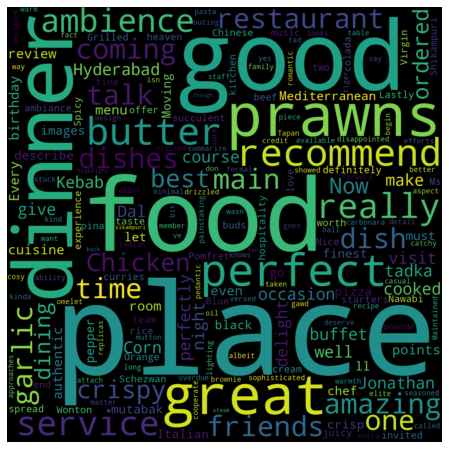

In [62]:
'''
Let us first group the required data 
'''

a = reviews_df.groupby(['Restaurant', 'Year','Review'])['Rating'].mean().sort_values(ascending = False).reset_index()
b = a[a.Year == 2019].head(10)

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Review')
cld(d)

In [63]:
b

Restaurant    Year  \
0                                          Khaan Saab 2019.00   
1   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
2   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
3   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
4   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
5   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
7   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
8   Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
11  Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   
12  Jonathan's Kitchen - Holiday Inn Express & Suites 2019.00   

                                               Review  Rating  
0   Food was very good .. service is even better.....    5.00  
1   This review has been long overdue, I visited t...    5.00  
2   I was invited to this place by one of my frien...    5.00  
3   I went to Jonathan's with team. I fell in love...    5.00  
4   Love your ambience , food and hospitality. Tha...    5.00  
5   Nice ambiance. This place has a very good fine...    5.00  
7   One of Hyderabad's most stylish fine dining pl...    5.00  
8   One of the few places in Hyderabad to boast of...    5.00  
11  Quality of food is really great. Ingredients a...    5.00  
12  Team's is quite good , especially The two host...    5.00

List size: 17


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

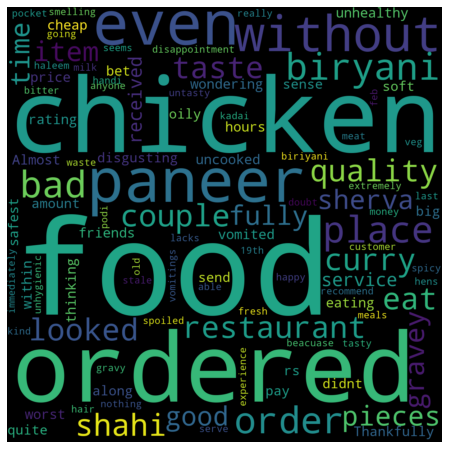

In [64]:
'''
Let us first group the required data 
'''

a = reviews_df.groupby(['Restaurant', 'Year','Review'])['Rating'].mean().sort_values(ascending = True).reset_index()
b = a[a.Year == 2019].head(10)

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Review')
cld(d)

Q. What are the additional features offered in expensive resuraunts ? 

List size: 114


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

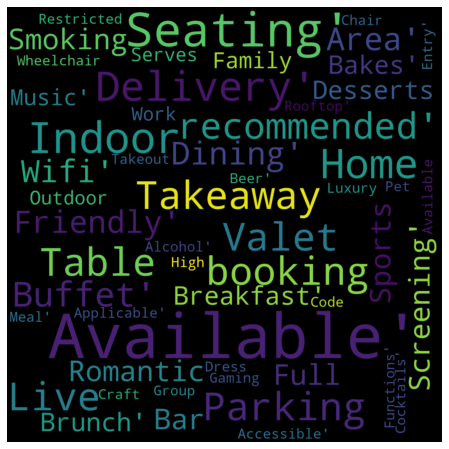

In [65]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = False).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'additional_services')
cld(d)

List size: 12


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

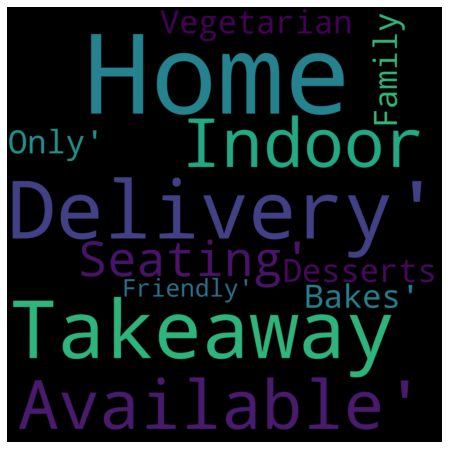

In [66]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = True).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'additional_services')
cld(d)

Q. What are the popular dishes in both expensive and cheap resturaunts 

List size: 72


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

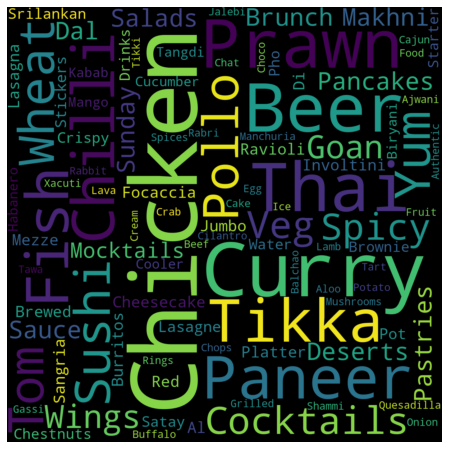

In [67]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = False).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Popular_Dishes')
cld(d)

List size: 16


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

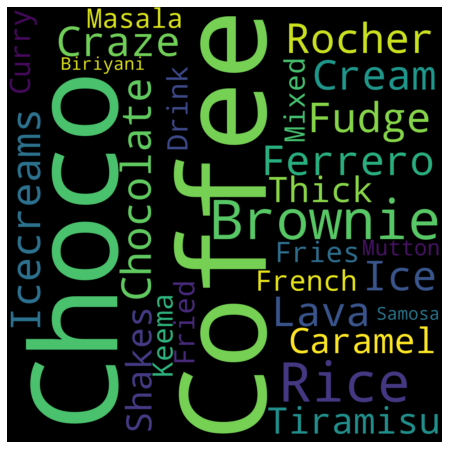

In [68]:
'''
Let us first group the required data 
'''

b = meta_df.sort_values(by='Cost',ascending = True).reset_index()[0:15]

'''
Plotting the word cloud 
'''
c,d=Row_lis2(b,'Popular_Dishes')
cld(d)

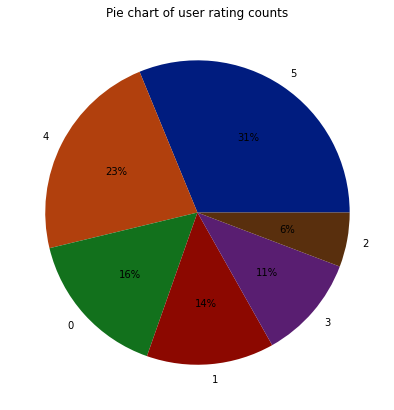

In [69]:

## Let us look at the distribution of the ratings
plt.figure(figsize=(10, 7))
# Rounding off the ratings to nearest upper integers
reviews_df['fRating'] = reviews_df['Rating'].apply(lambda x: math.floor(x+0.6))
plot_df = reviews_df['fRating'].value_counts().reset_index().rename(columns={'index':'fRating','fRating':'count'})

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(plot_df['count'], labels=plot_df['fRating'], colors=palette_color,explode=None, autopct='%.0f%%')
plt.title('Pie chart of user rating counts')
plt.show()
reviews_df.drop(['fRating'], axis = 1,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


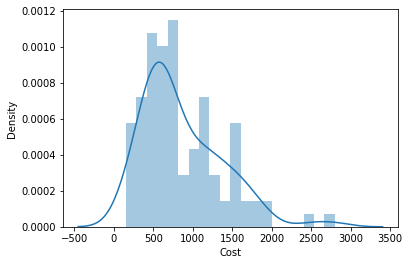

In [70]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=meta_df['Cost'], bins=20,kde=True,hist = True)

In [71]:
# Review per hour
reviews_hour = reviews_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')


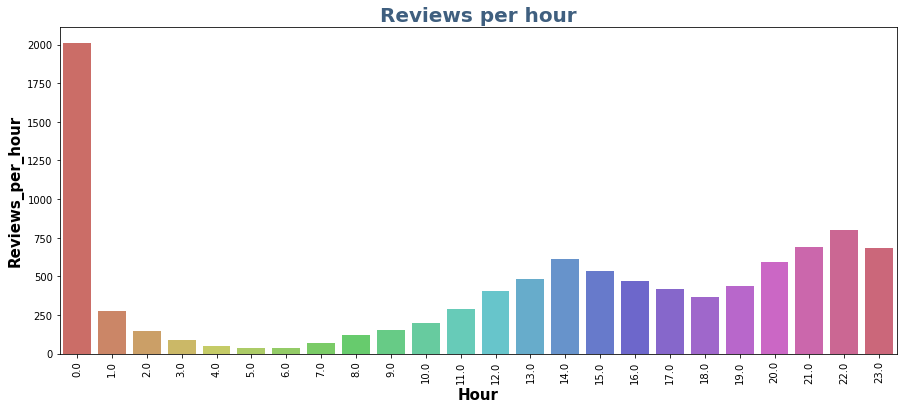

In [72]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='hls')
plt.show()

Text(0.5, 1.0, 'Per person estimated Cost of dining at different Location of Restaurants')

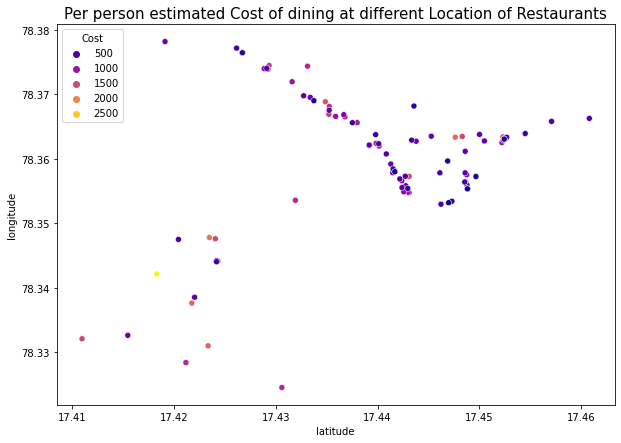

In [73]:
# Per person estimated Cost of dining at different Location of Restaurants
plt.figure(figsize=(10,7))
sns.scatterplot(x="latitude", y="longitude",
                hue="Cost", palette="plasma",data=meta_df)
plt.title('Per person estimated Cost of dining at different Location of Restaurants',fontsize = 15)

In [74]:
#grouping reviewers with low rating and high reviews and followers
critics_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[:30]
critics_df.head()

Reviewer  Reviews  Followers  Rating
0                               0     0.00       0.00    0.00
1                           Sumit   401.00    2736.00    1.00
2                             D.S   195.00    2079.00    1.00
3                       Ram Raju.   115.00     282.00    1.00
4  Farhaan Nasir (bankruptfoodie)   107.00     503.00    1.00

# ---x---x----x----x----x----x---x---x

# **DONT RUN**



## **Sentiment analysis** 

In [ ]:
review_df=reviews_df

In [ ]:
review_df.dropna(inplace = True)

In [ ]:
review_df.reset_index(inplace=True)

In [ ]:
review_df['clean_review']=hero.clean(review_df['Review'])

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
review_df['clean_review']=review_df['clean_review'].apply(lambda x: remove_emoji (x))

## Sentiment Intensity Analyzer (vaderSentiment)
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

###VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool. 
i.e the context of language is not taken into account


This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [ ]:
sia= SIA()
results = []
for line in review_df['clean_review']:
    
    scores = sia.polarity_scores (line)
    #scores['clean_review'] = line
    results.append(scores)

df=pd.DataFrame.from_records (results)

df[:5]

neg  neu  pos  compound
0 0.00 0.44 0.56      0.97
1 0.00 0.37 0.63      0.94
2 0.00 0.57 0.43      0.92
3 0.00 0.54 0.46      0.86
4 0.00 0.39 0.61      0.94

In [ ]:
review_df=pd.concat([review_df, df], axis=1)


In [ ]:
review_df.drop(['index'], axis = 1,inplace= True)
review_df.reset_index(inplace=True)

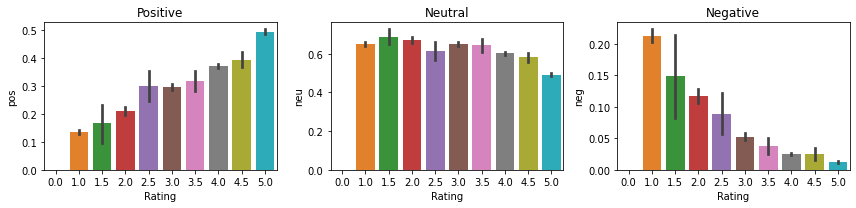

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=review_df, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=review_df, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=review_df, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

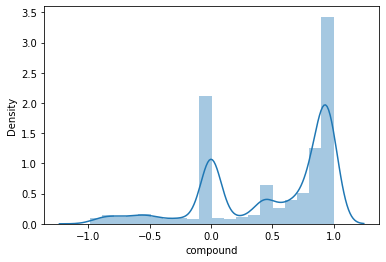

In [ ]:
## Let us look at the distribution of the per person costs of the restaurants
sns.distplot(a=review_df['compound'], bins=20,kde=True,hist = True)

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

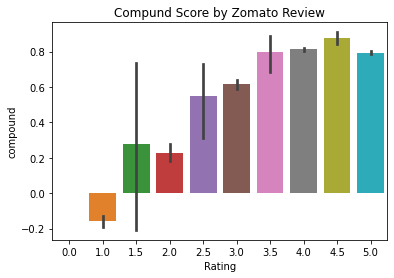

In [ ]:
ax = sns.barplot(data=review_df, x='Rating', y='compound')
ax.set_title('Compund Score by Zomato Review')
plt.show()

##About the Scoring
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

For more information refer documentation [here](https://github.com/cjhutto/vaderSentiment) 


In [ ]:
review_df[(review_df['compound']>= 0.05)&(review_df['compound']< 0.1)][['Review','Restaurant','compound']][:5]

Review  \
75   I have been at this place for dinner a few day...   
80   Hostile staff, okeish food, not so great ambia...   
200  We were 4 people who visited this place on Thu...   
799  Chicken inside the Shawarma got spoiled and sm...   
849  One place to order pasta when you’re hungry in...   

                   Restaurant  compound  
75            Beyond Flavours      0.08  
80            Beyond Flavours      0.08  
200                  Flechazo      0.08  
799  Shah Ghouse Spl Shawarma      0.08  
849               Hyper Local      0.08

In [ ]:
review_df["label"] = 0

review_df.loc[review_df['compound']>= 0.05,'label']  =  1

review_df.loc[review_df['compound']<   0.05,'label']  = -1
review_df.head()



review_df.loc[df['compound']>= 0.05,'Mood']  =  'positive'
review_df.loc[review_df['compound']< 0.05,'Mood']  = 'negative'



review_df[:1]


index       Restaurant           Reviewer  \
0      0  Beyond Flavours  Rusha Chakraborty   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...    5.00      0.00   

     Year  Month  Hour  Reviews  Followers  \
0 2019.00   5.00 15.00     1.00       2.00   

                                        clean_review  neg  neu  pos  compound  \
0  ambience good food quite good saturday lunch c... 0.00 0.44 0.56      0.97   

   label      Mood  
0      1  positive

## RoBerta Pretrained Model

In [ ]:
!pip install -q transformers

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import pipeline

from tqdm.notebook import tqdm

     |████████████████████████████████| 6.6 MB 28.0 MB/s 


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
i=0 
results = []
for line in tqdm(review_df['clean_review']):  
  try:  
    scores = polarity_scores_roberta(line[:512])   
    results.append(scores)
    i=i+1
  except RuntimeError:
    print(f'broke for index: {i}')
  except Exception:
    print(f'Something other than RTE, index: {i}')
df=pd.DataFrame.from_records (results)

df[:5]

  0%|          | 0/9959 [00:00<?, ?it/s]

roberta_neg  roberta_neu  roberta_pos
0         0.00         0.03         0.97
1         0.00         0.07         0.93
2         0.00         0.02         0.98
3         0.00         0.06         0.94
4         0.00         0.02         0.98

In [ ]:
review_df=pd.concat([review_df, df], axis=1)

In [ ]:
review_df.drop(['index'], axis = 1,inplace= True)
review_df.reset_index(inplace=True)

## Sentiment Analysis with HuggingFace Transformers Pipeline

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 29.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.4 MB/s eta 0:00:00


In [ ]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

In [ ]:
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
i=0 
results = []
for line in tqdm( review_df['clean_review']):  
  try:  
    scores = sentiment_task(line[:512])   
    results.append(scores)
    i=i+1
  except RuntimeError:
    print(f'broke for index :{i}')
df=pd.DataFrame.from_records (results)

df[:1]

  0%|          | 0/9959 [00:00<?, ?it/s]

0
0  {'label': 'Positive', 'score': 0.6280002593994...

In [ ]:
review_df['clean_review']

In [ ]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
df.rename(columns = {0:'data'}, inplace = True)

In [ ]:
df=df["data"].apply(pd.Series)

In [ ]:
df.rename(columns = {'label':'Rmood'}, inplace = True)

In [ ]:
review_df=pd.concat([review_df, df], axis=1)

In [ ]:
review_df.drop(['index'], axis = 1,inplace= True)
review_df.reset_index(inplace=True)

In [ ]:
review_df.columns

Index(['index', 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Pictures',
       'Year', 'Month', 'Hour', 'Reviews', 'Followers', 'clean_review', 'neg',
       'neu', 'pos', 'compound', 'label', 'Mood', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Rmood', 'score'],
      dtype='object')

In [ ]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'latitude', 'longitude', 'additional_services', 'Has_Featured',
       'known_for', 'status', 'Popular_Dishes'],
      dtype='object')

## Comparing output of vader and  Roberta 

In [ ]:
df = pd.merge(left = review_df, right=meta_df,how = 'inner',left_on = 'Restaurant',right_on = 'Name',validate='m:m')

Text(0.5, 1.0, 'RoBerta Pretrained Model')

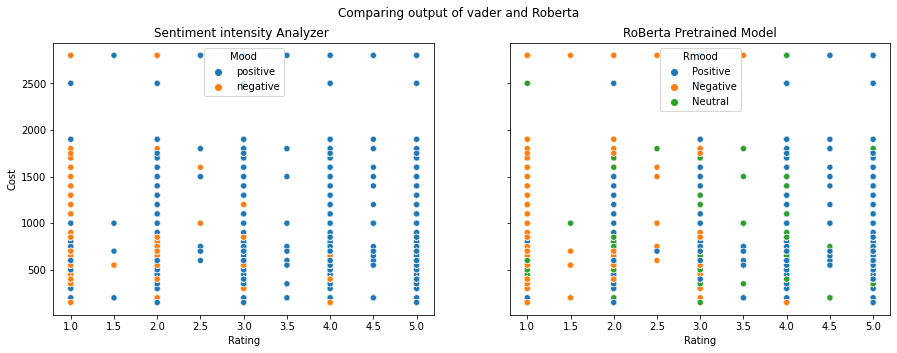

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparing output of vader and Roberta')

# Sentiment intensity Analyzer 
sns.scatterplot(data=df, x="Rating", y="Cost", hue="Mood",ax=axes[0])
axes[0].set_title('Sentiment intensity Analyzer ')

# RoBerta Pretrained Model 
sns.scatterplot(data=df, x="Rating", y="Cost", hue="Rmood",ax=axes[1])
axes[1].set_title('RoBerta Pretrained Model')



In [ ]:
def show (df,x,y,z,score):
  fig, axs = plt.subplots(1, 3, figsize=(12, 3))
  sns.barplot(data=df, x=score, y=x, ax=axs[0])
  sns.barplot(data=df, x=score, y=y, ax=axs[1])
  sns.barplot(data=df, x=score, y=z, ax=axs[2])
  axs[0].set_title('Positive')
  axs[1].set_title('Neutral')
  axs[2].set_title('Negative')
  plt.tight_layout()
  plt.show()

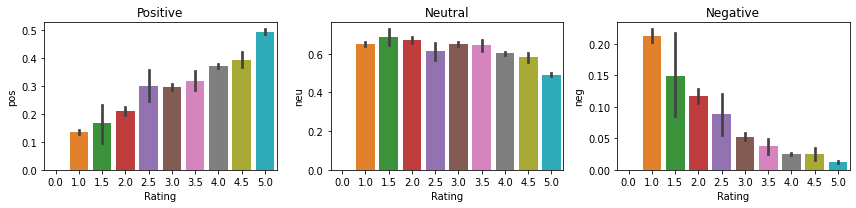

In [ ]:
show (review_df,review_df['pos'],review_df['neu'],review_df['neg'],review_df['Rating'])

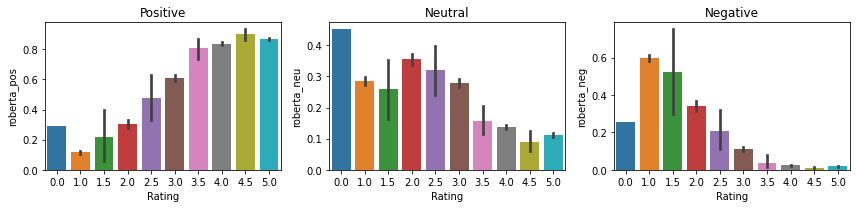

In [ ]:
show (review_df,review_df['roberta_pos'],review_df['roberta_neu'],review_df['roberta_neg'],review_df['Rating'])

We can see that Roboto has performed much better, hence we will move forward with this model. 

In [ ]:
# Writing the dataframe to a csv to ensure no data loss in working
'''
CAUTION : Running this will make changes to Data frame double check before running 

#review_df.to_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df.csv')
'''

"\nCAUTION : Running this will make changes to Data frame double check before running \n\n#review_df.to_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df.csv')\n"

# ---x---x----x----x----x----x---x---x

In [418]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file

review_df = pd.read_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df.csv')

In [419]:
review_df.drop(['neg','neu','pos','Mood','label'], axis = 1,inplace= True)

# **Clustering of Restaurants**
1. Clustering of the restaurants into segments.The data has valuable information around costing and rating  which can be used in cost vs. benefit analysis

 Mergeing columns to perform clustering 

In [331]:
#Grouping the data of diffrent returants to perform clustering. 
df = review_df.dropna().groupby(by ='Restaurant')['compound','Rating'].agg({'compound':mean,'Rating':mean}).reset_index()
df.rename(columns={'compound':'Mean_compound','Rating':'Avg_Rating'},inplace = True)
df.sort_values('Avg_Rating',ascending = False,inplace = True)

# Target columns of meta df 
x = meta_df[['Name','Cost','latitude','longitude', 'Cuisines']]

# creating a df to perform clustering 
merged_df = pd.merge(left = df, right=x,how = 'inner',left_on = 'Restaurant',right_on = 'Name')


In [332]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

## Cluster restuarants based on Rating and Cost.
**DONT RUN** 

In [203]:
merged_df.columns

Index(['Restaurant', 'Mean_compound', 'Avg_Rating', 'Name', 'Cost', 'latitude',
       'longitude', 'Cuisines'],
      dtype='object')

In [204]:
 # Taking the subset of the data required for the analysis
 RC_cluster= merged_df.loc[0:,['Name','Cost','Avg_Rating']].set_index('Name')
 RC_cluster.dropna(inplace=True)

In [205]:
# Lets standerdize the features

clust_arr=sc.fit_transform(RC_cluster)
RC_cluster = pd.DataFrame(clust_arr , columns= RC_cluster.columns.to_list())

Text(0.5, 1.0, 'Avg Rating Vs Cost Plot')

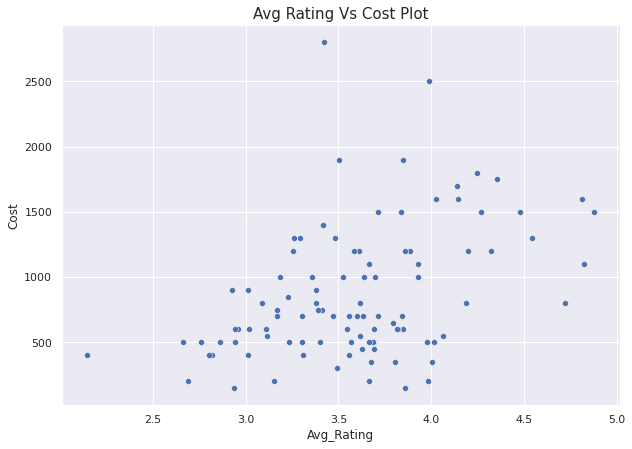

In [206]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Avg_Rating", y="Cost",
                palette="plasma",data=merged_df)
plt.title('Avg Rating Vs Cost Plot',fontsize = 15)

In [207]:
# K Means Clustering Algorithm for forming  clusters based on Rating and Cost
# Initiating empty lists for storing different evaluation metrics
inertia=[]
silhouette_scorelist = []
distortions = []

# Applying the k-mean clustering algorithm with k values(number of clusters) ranging from 1-10
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(RC_cluster)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(RC_cluster)
  distortions.append(sum(np.min(cdist(RC_cluster, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / RC_cluster.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(RC_cluster, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [208]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions, 'silhouette_score': [np.nan]+silhouette_scorelist})
df

No_cluster  Inertia  Distortions  silhouette_score
0           1   200.00         1.22               NaN
1           2   103.29         0.90              0.45
2           3    73.38         0.73              0.38
3           4    53.30         0.60              0.42
4           5    38.79         0.55              0.44
5           6    33.31         0.50              0.38
6           7    27.33         0.47              0.39
7           8    24.06         0.44              0.39
8           9    21.75         0.41              0.33
9          10    19.70         0.39              0.35

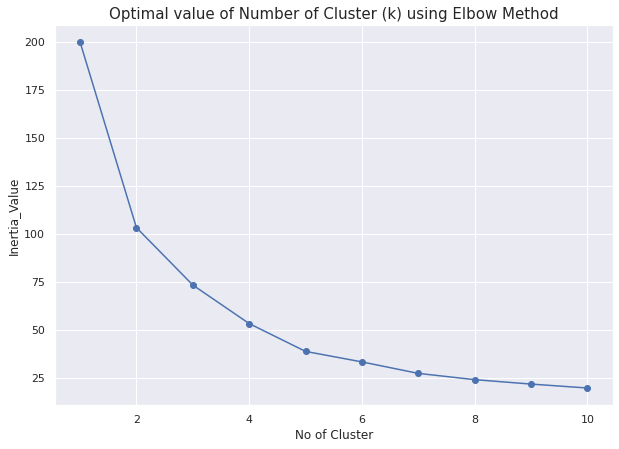

In [209]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.ylabel('Inertia_Value')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

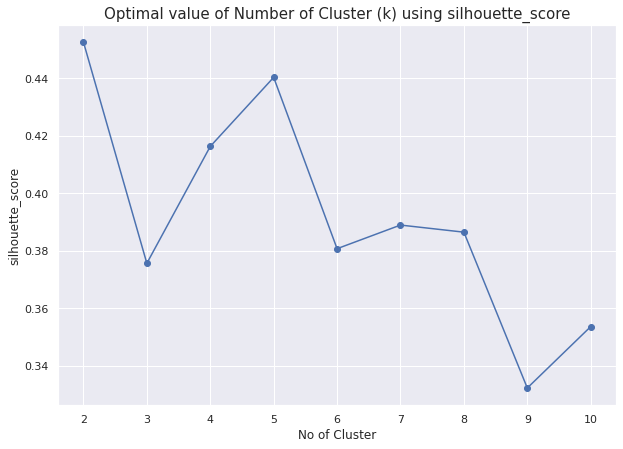

In [210]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.45255179140701
For n_clusters = 3 The average silhouette_score is : 0.37560640851364613
For n_clusters = 4 The average silhouette_score is : 0.416258340980241
For n_clusters = 5 The average silhouette_score is : 0.44027179031647073


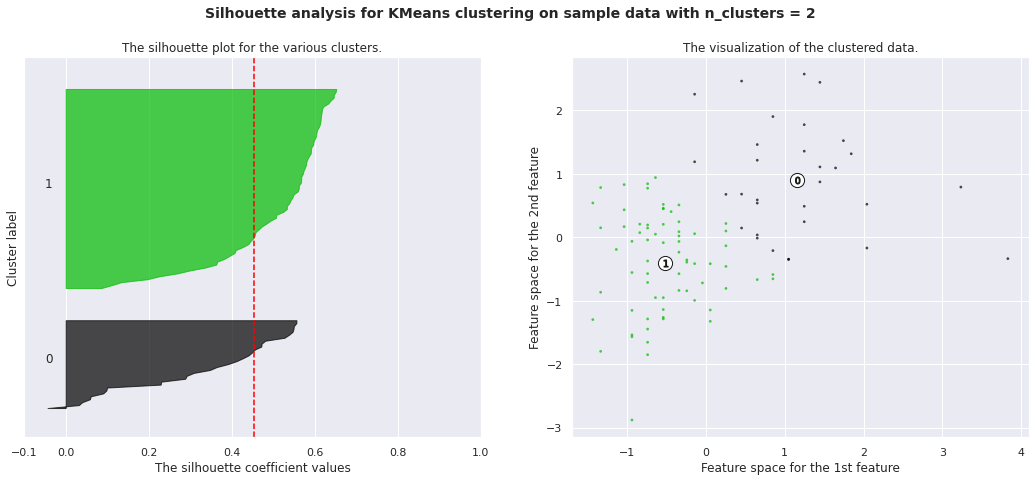

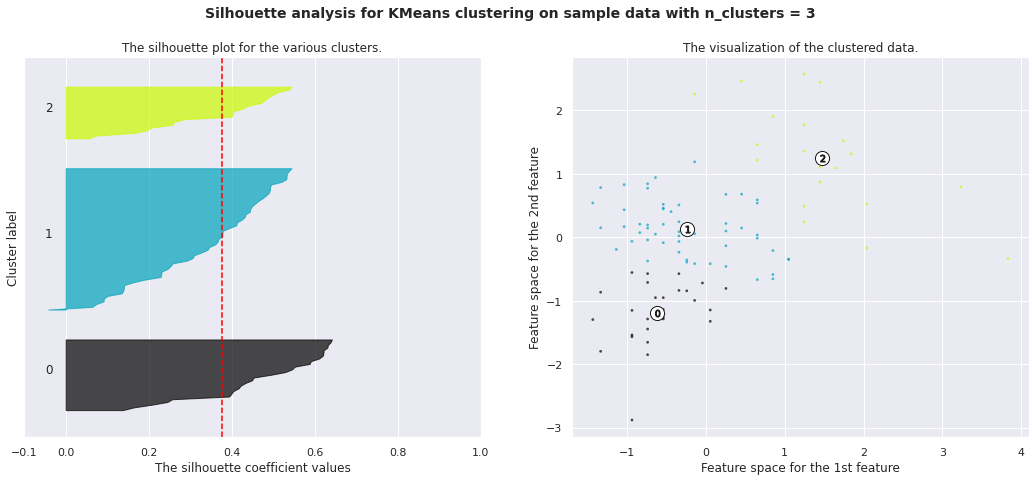

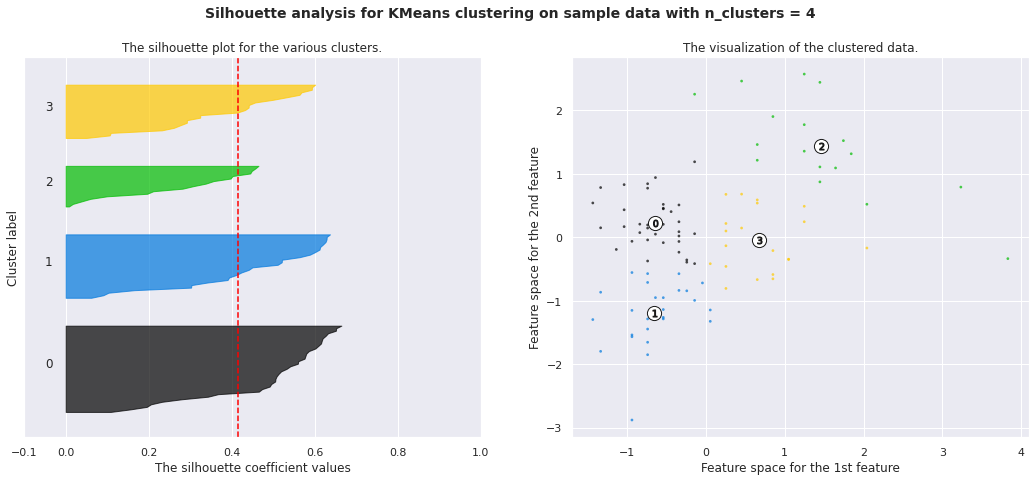

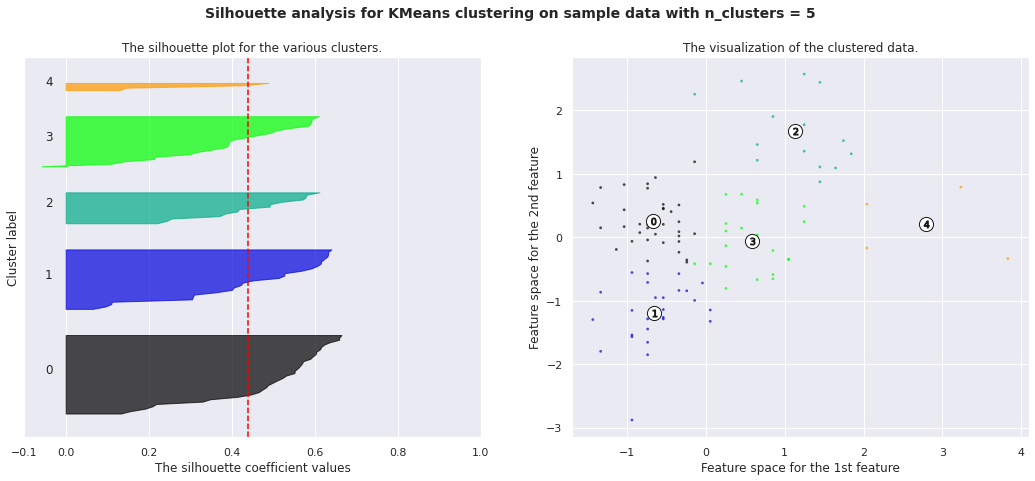

In [211]:
# Lets do Silhouette analysis for K Means clustering Algorithem and find optimum number of cluster(k)

range_n_clusters = [2,3,4,5]
X = clust_arr
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [212]:
# So now lets fit the K means Clustering Algorithem for  optimal number of clusters (n_cluster = 3)
kmeans= KMeans(n_clusters = 4,init="k-means++")
kmeans.fit(RC_cluster)
# Predicted values of clusters
y_kmeans = kmeans.predict(RC_cluster)
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1,
       1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [213]:
merged_df.shape, len(y_kmeans)

((100, 8), 100)

In [214]:
merged_df['RC_cluster'] = y_kmeans

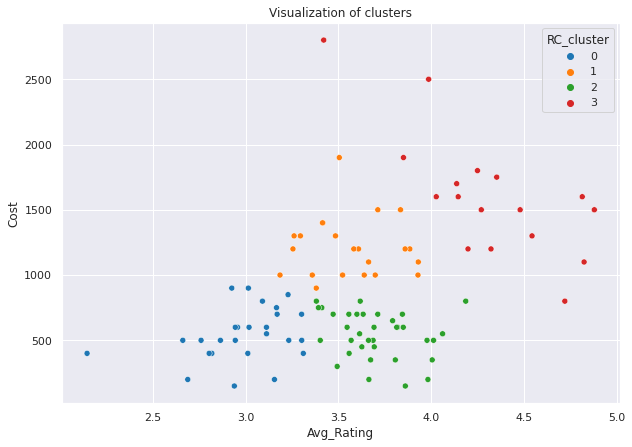

In [215]:
# Visualization of clusters
plt.figure(figsize=(10,7))
sns.scatterplot(data=merged_df, x='Avg_Rating', y = 'Cost', hue ='RC_cluster',palette ="tab10")
plt.title("Visualization of clusters", fontsize=12)
plt.show()

This cluster can be divided into 4 groups 


1.   High rating high cost
2.   Low rating Low cost
3.   Low rating Low cost
4.   Average rating high cost




### Low cost low rating


In [216]:
merged_df[merged_df.RC_cluster==0].describe()

Mean_compound  Avg_Rating   Cost  latitude  longitude  RC_cluster
count          26.00       26.00  26.00     26.00      26.00       26.00
mean            0.32        2.99 542.31     17.44      78.36        0.00
std             0.17        0.25 202.33      0.01       0.01        0.00
min            -0.01        2.15 150.00     17.42      78.33        0.00
25%             0.18        2.88 400.00     17.44      78.36        0.00
50%             0.35        3.01 500.00     17.44      78.36        0.00
75%             0.45        3.16 675.00     17.45      78.36        0.00
max             0.56        3.31 900.00     17.46      78.38        0.00

In [217]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[merged_df[merged_df.RC_cluster==0].iloc[3]['latitude'],merged_df[merged_df.RC_cluster==1].iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df[merged_df.RC_cluster==0].index:
  if merged_df[merged_df.RC_cluster==0].loc[i,'RC_cluster'] == 0:
    icon_name = folium.Icon(color='blue',icon='none') 

  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

In [218]:
a,b=Row_lis(merged_df[merged_df.RC_cluster==0],'Cuisines')
a.value_counts()[:5]

List size: 73


(Cuisines,) 
North Indian    15
Chinese         13
Biryani          8
Fast Food        8
Asian            3
dtype: int64

### High Cost and Average Rating 


In [219]:
merged_df[merged_df.RC_cluster==1].describe()

Mean_compound  Avg_Rating    Cost  latitude  longitude  RC_cluster
count          22.00       22.00   22.00     22.00      22.00       22.00
mean            0.66        3.56 1213.64     17.44      78.36        1.00
std             0.08        0.23  231.55      0.01       0.01        0.00
min             0.51        3.19  900.00     17.42      78.32        1.00
25%             0.59        3.39 1000.00     17.43      78.35        1.00
50%             0.67        3.55 1200.00     17.44      78.36        1.00
75%             0.72        3.71 1300.00     17.44      78.37        1.00
max             0.82        3.93 1900.00     17.45      78.37        1.00

In [220]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[merged_df[merged_df.RC_cluster==1].iloc[3]['latitude'],merged_df[merged_df.RC_cluster==1].iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df[merged_df.RC_cluster==1].index:
  if merged_df[merged_df.RC_cluster==1].loc[i,'RC_cluster'] == 1:
    icon_name = folium.Icon(color='blue',icon='none') 

  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

In [221]:
a,b=Row_lis(merged_df[merged_df.RC_cluster==1],'Cuisines')
a.value_counts()[:5]

List size: 75


(Cuisines,) 
North Indian    16
Chinese         11
Italian          8
Continental      7
Mughlai          3
dtype: int64

###  Low Cost Average Rating 


In [222]:
merged_df[merged_df.RC_cluster==2].describe()

Mean_compound  Avg_Rating   Cost  latitude  longitude  RC_cluster
count          35.00       35.00  35.00     35.00      35.00       35.00
mean            0.57        3.71 544.29     17.44      78.36        2.00
std             0.14        0.20 177.30      0.01       0.01        0.00
min             0.28        3.38 150.00     17.42      78.34        2.00
25%             0.47        3.56 450.00     17.44      78.36        2.00
50%             0.57        3.67 550.00     17.44      78.36        2.00
75%             0.67        3.83 700.00     17.45      78.36        2.00
max             0.81        4.19 800.00     17.46      78.38        2.00

In [223]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[merged_df[merged_df.RC_cluster==2].iloc[10]['latitude'],merged_df[merged_df.RC_cluster==2].iloc[10]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=60)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df[merged_df.RC_cluster==2].index:
  if merged_df[merged_df.RC_cluster==2].loc[i,'RC_cluster'] == 2:
    icon_name = folium.Icon(color='none',icon='none') 

  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

In [224]:
a,b=Row_lis(merged_df[merged_df.RC_cluster==1],'Cuisines')
a.value_counts()[:5]

List size: 75


(Cuisines,) 
North Indian    16
Chinese         11
Italian          8
Continental      7
Mughlai          3
dtype: int64

###High cost High rating 


In [225]:
merged_df[merged_df.RC_cluster==3].describe()

Mean_compound  Avg_Rating    Cost  latitude  longitude  RC_cluster
count          17.00       17.00   17.00     17.00      17.00       17.00
mean            0.84        4.31 1608.82     17.44      78.35        3.00
std             0.07        0.38  483.55      0.01       0.01        0.00
min             0.65        3.42  800.00     17.41      78.33        3.00
25%             0.80        4.14 1300.00     17.42      78.34        3.00
50%             0.84        4.27 1600.00     17.44      78.36        3.00
75%             0.87        4.54 1750.00     17.45      78.36        3.00
max             0.93        4.88 2800.00     17.45      78.37        3.00

In [226]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[merged_df[merged_df.RC_cluster==3].iloc[3]['latitude'],merged_df[merged_df.RC_cluster==3].iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df[merged_df.RC_cluster==3].index:
  if merged_df[merged_df.RC_cluster==3].loc[i,'RC_cluster'] == 3:
    icon_name = folium.Icon(color='blue',icon='none') 

  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

In [227]:
a,b=Row_lis(merged_df[merged_df.RC_cluster==3],'Cuisines')
a.value_counts()[:5]

List size: 58


(Cuisines,)  
North Indian     12
Asian             9
Continental       8
Italian           5
Mediterranean     5
dtype: int64

## Cluster restuarants based on Locations 


In [352]:
# Taking the subset of the data required for the analysis
geo_cluster_df = merged_df.loc[0:,['Name','latitude','longitude']].set_index('Name')
geo_cluster_df.dropna(inplace=True)

In [353]:
# Lets standerdize the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
clust_arr=sc.fit_transform(geo_cluster_df)
geo_cluster_df = pd.DataFrame(clust_arr , columns= geo_cluster_df.columns.to_list())

In [354]:
geo_cluster_df.head()

latitude  longitude
0      0.34      -0.19
1      0.30      -0.18
2     -0.44       0.93
3      0.27      -0.25
4     -0.41       0.86

Text(0.5, 1.0, 'geographical distribution of the restaurants')

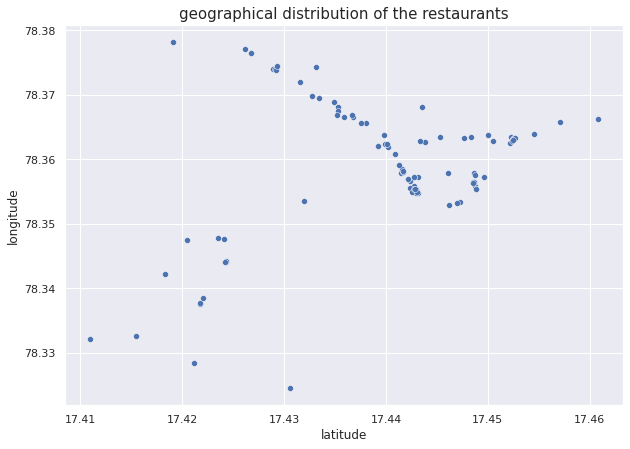

In [355]:
# Before going into the clustering further, let us have a look at the geographical distribution of the restaurants again
plt.figure(figsize=(10,7))
sns.scatterplot(x="latitude", y="longitude",
                palette="plasma",data=merged_df)
plt.title('geographical distribution of the restaurants',fontsize = 15)

In [356]:
# K Means Clustering Algorithm for forming geographical clusters
# Initiating empty lists for storing different evaluation metrics
inertia=[]
silhouette_scorelist = []
distortions = []

# Applying the k-mean clustering algorithm with k values(number of clusters) ranging from 1-10
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(geo_cluster_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(geo_cluster_df)
  distortions.append(sum(np.min(cdist(geo_cluster_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / geo_cluster_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(geo_cluster_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [357]:
# Lets from dataframe of different Metrices like Inertia, distortion & silhouette_score
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions, 'silhouette_score': [np.nan]+silhouette_scorelist})
df

No_cluster  Inertia  Distortions  silhouette_score
0           1   200.00         1.16               NaN
1           2    92.44         0.83              0.63
2           3    41.39         0.58              0.59
3           4    27.90         0.43              0.55
4           5    20.76         0.35              0.56
5           6    15.42         0.32              0.54
6           7    12.63         0.27              0.55
7           8    10.10         0.24              0.58
8           9     8.39         0.22              0.57
9          10     7.13         0.20              0.58

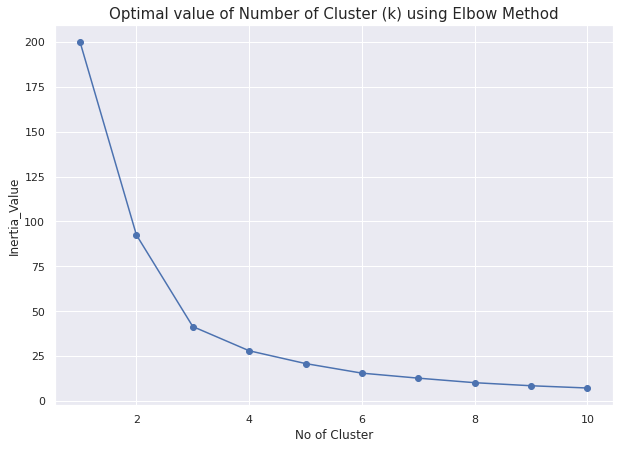

In [358]:
# Lets find optimal value of Number of Cluster (k) using Elbow Method. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.ylabel('Inertia_Value')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using Elbow Method',fontsize=15)
plt.show()

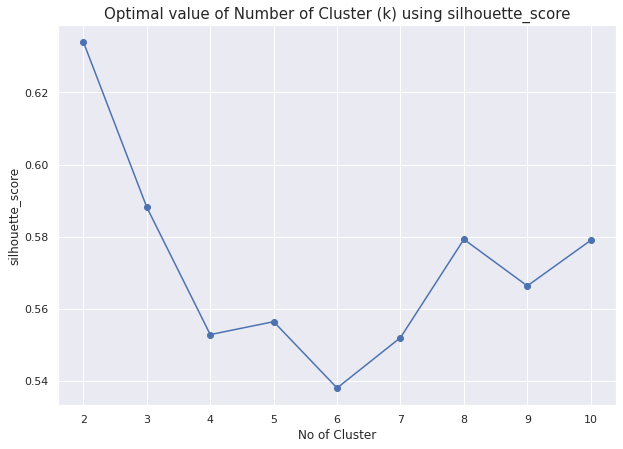

In [359]:
# # Lets find optimal value of Number of Cluster (k) using silhouette_score. 
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.title('Optimal value of Number of Cluster (k) using silhouette_score',fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6339684657012958
For n_clusters = 3 The average silhouette_score is : 0.5881341635907288


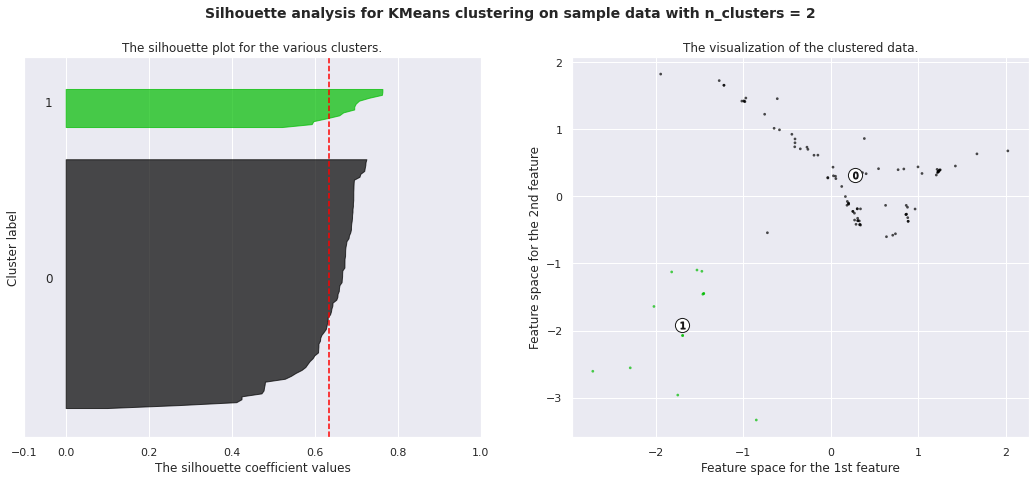

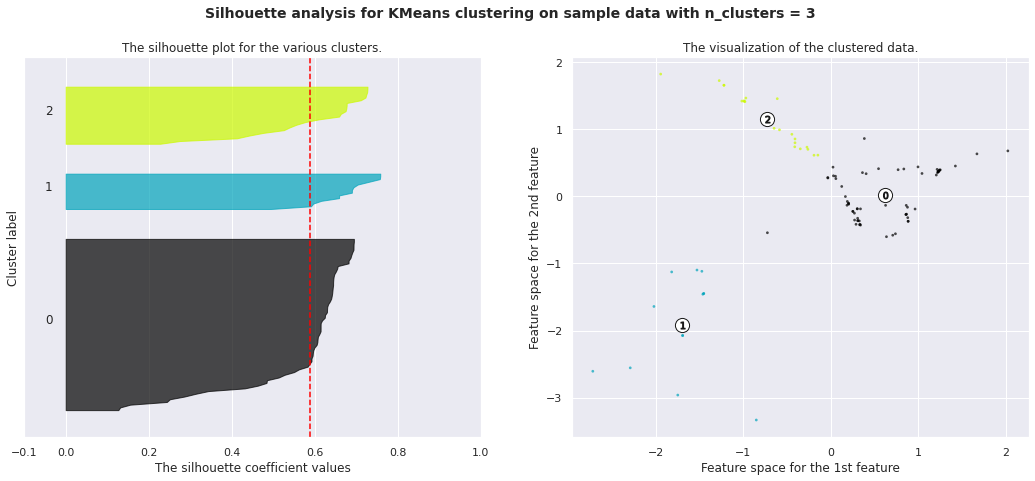

In [360]:
# Lets do Silhouette analysis for K Means clustering Algorithem and find optimum number of cluster(k)

range_n_clusters = [2,3]
X = clust_arr
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [361]:
# So now lets fit the K means Clustering Algorithem for  optimal number of clusters (n_cluster = 3)
kmeans= KMeans(n_clusters = 3,init="k-means++")
kmeans.fit(geo_cluster_df)
# Predicted values of clusters
y_kmeans = kmeans.predict(geo_cluster_df)
y_kmeans

array([0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0], dtype=int32)

In [362]:
merged_df.shape, len(y_kmeans)

((100, 10), 100)

In [363]:
merged_df['Geo Clusters'] = y_kmeans

Text(0.5, 1.0, 'Number of Restaurants in different Clusters')

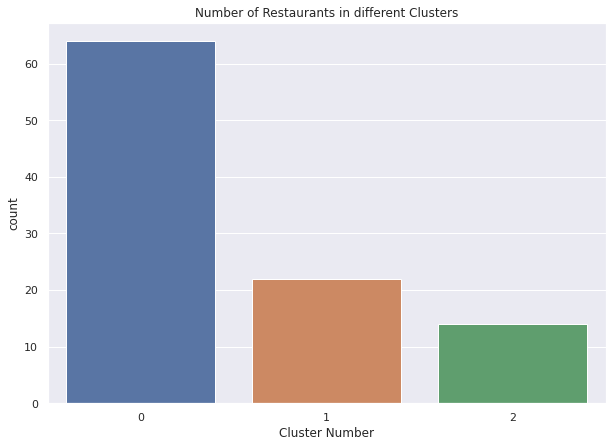

In [364]:
# Lets find out the number of restaurants in each Cluster
plt.figure (figsize = (10,7))
p=sns.countplot(merged_df['Geo Clusters'])
p.set_xlabel('Cluster Number')
plt.title("Number of Restaurants in different Clusters")

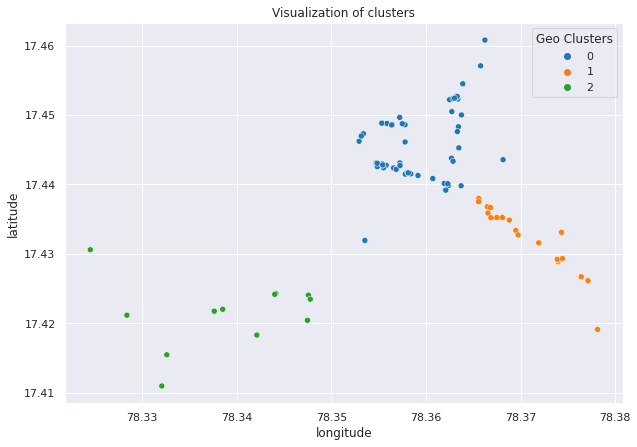

In [365]:
# Visualization of clusters
plt.figure(figsize=(10,7))
sns.scatterplot(data=merged_df, x='longitude', y = 'latitude', hue ='Geo Clusters',palette ="tab10")
plt.title("Visualization of clusters", fontsize=12)
plt.show()

In [366]:
# Creating the folium map variable
mapit = folium.Map(width=750,height=450,
                   location=[meta_df.iloc[3]['latitude'],meta_df.iloc[5]['longitude']],
                   zoom_start=13,min_zoom=12,max_zoom=20)

mapit.save('map.html')

# Adding the markers of restaurant locations
for i in merged_df.index:
  if merged_df.loc[i,'Geo Clusters'] == 0:
    icon_name = folium.Icon(color='purple',icon='none') 
  elif merged_df.loc[i,'Geo Clusters'] == 1:
    icon_name = folium.Icon(color='red',icon='none')
  else:
    icon_name = folium.Icon(color='green',icon='none')
  folium.Marker(location=[merged_df.latitude[i], merged_df.longitude[i]],icon=icon_name).add_to(mapit)

mapit

In [396]:
geo_clust_names = {
    0: 'Old Bombay Rd(between Khajaguda Jn and ORR Jn)',
    1: 'Old Bombay Rd(between ORR junction and ISB Junction)',
    2: 'Near Wipro and ISB'
}


In [401]:
merged_df['Geo Cluster Name'] = merged_df['Geo Clusters'].apply(lambda x: geo_clust_names[x])

# ---x---x----x----x----x----x---x---x

# Cost Benifit analysis 

1. The data is vizualized as it becomes easy to analyse data at instant. 

2. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.





 **Defining functions** 

In [420]:
stop_words = stopwords.words('english')
'''
Use this function to process 
'''
def process_text (headlines):
 tokens = []
 for line in headlines:
    toks= tokenizer.tokenize(line)
    toks= [t.lower() for t in toks if t.lower() not in stop_words]
    tokens.extend (toks)
 return tokens




In [421]:
 def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

Preparing the data to for an effective cost_Benifit analysis 

In [422]:
review_df['clean_review']=review_df['clean_review'].apply(str)
review_df['clean_review']=review_df['clean_review'].apply(lambda x:deEmojify(x))

In [423]:
merged_df.columns

Index(['Unnamed: 0', 'Restaurant', 'Mean_compound', 'Avg_Rating', 'Name',
       'Cost', 'latitude', 'longitude', 'Cuisines', 'RC_cluster',
       'Geo Clusters', 'Geo Cluster Name'],
      dtype='object')

In [281]:
# Writing the dataframe to a csv to ensure no data loss in working

'''
CAUTION : Running this will make changes to Data frame double check before running 

#merged_df.to_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df1.csv')
'''


"\nCAUTION : Running this will make changes to Data frame double check before running \n\n#merged_df.to_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df1.csv')\n"

In [412]:
# reading the dataframe from the csv file again to import the scraped data from the already prepared csv file

merged_df = pd.read_csv('/content/drive/MyDrive/Almabetter Projects /Zomato /Data/df1.csv')

In [411]:
merged_df.columns

Index(['Restaurant', 'Mean_compound', 'Avg_Rating', 'Name', 'Cost', 'latitude',
       'longitude', 'Cuisines', 'RC_cluster', 'Geo Clusters',
       'Geo Cluster Name'],
      dtype='object')

In [424]:
merged_df.drop(['Unnamed: 0'], axis = 1,inplace= True)
review_df.drop(['Unnamed: 0'], axis = 1,inplace= True)

In [425]:
review_df = pd.merge(left = review_df, right=merged_df,how = 'inner',left_on = 'Restaurant',right_on = 'Restaurant')

In [427]:
review_df.drop('Name', axis = 1,inplace= True)


In [428]:
label_names = {
    'Positive':0,
    'Negative':1,
    'Neutral':2
              }
review_df['label'] = review_df['Rmood'].apply(lambda x: label_names[x])

## Obsession and Service 

Analysis of reviews of resturaunts with positive Sentiment and negative sentiment, to find the key factor which can lead to success of a resturaunt.  

In [429]:
pos_lines= list(review_df[review_df.label==0].clean_review)
pos_tokens = process_text(pos_lines) 
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('good', 4844),
 ('food', 3690),
 ('place', 3581),
 ('service', 1898),
 ('great', 1492),
 ('ambience', 1481),
 ('chicken', 1438),
 ('taste', 1207),
 ('nice', 1163),
 ('really', 1087)]

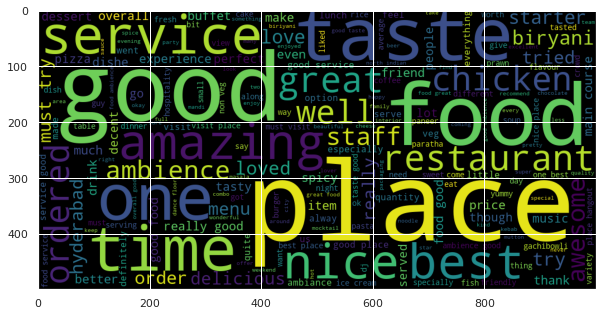

In [430]:
# Lets Findout the frequency or importance of the Words used by customer for negative reviews
from wordcloud import WordCloud
word_cloud = ""
for row in review_df[review_df['Rmood']=='Positive'].clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

The most reaccuring words in positive reviews are 

In [431]:
neg_lines= list(review_df[review_df.label==1].clean_review)
neg_tokens = process_text(neg_lines) 
neg_freq = nltk.FreqDist(neg_tokens)
neg_freq.most_common(10)

[('food', 1179),
 ('place', 799),
 ('service', 634),
 ('good', 603),
 ('ordered', 516),
 ('chicken', 494),
 ('bad', 458),
 ('worst', 415),
 ('order', 396),
 ('taste', 373)]

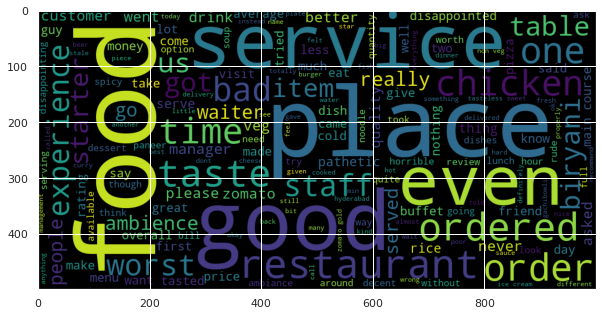

In [432]:
# Lets Findout the frequency or importance of the Words used by customer for negative reviews
from wordcloud import WordCloud
word_cloud = ""
for row in review_df[review_df['Rmood']=='Negative'].clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)

From the word cloud we can observe that these customer reviews obsess about service, starters, chicken, biryani, pizza. For any restaurants in this area it has to ensure that the following things are on point 
 
 

*   Chicken biryani is the favourite, and if it is offered in the restaurant quality, quantity and cost should be assured. 
*   Restaurants with negative sentiment should invest in training their staff members to handle unforeseen situations. As we can see, maximum bad reviews include elements of complaints against the staff members.


*   As i scanned accross positive frequently occured positive words one word which stood out was '[gachibowli](https://www.google.com/maps/place/Gachibowli,+Hyderabad,+Telangana,+India/@17.4461028,78.3248398,14z/data=!4m5!3m4!1s0x3bcb93a276decedf:0x2c12e79e6f9344e2!8m2!3d17.4400802!4d78.3489168)', which also turns out to be the area bounding our Data Set.  


 
 




## Picturesque  Surroundings

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

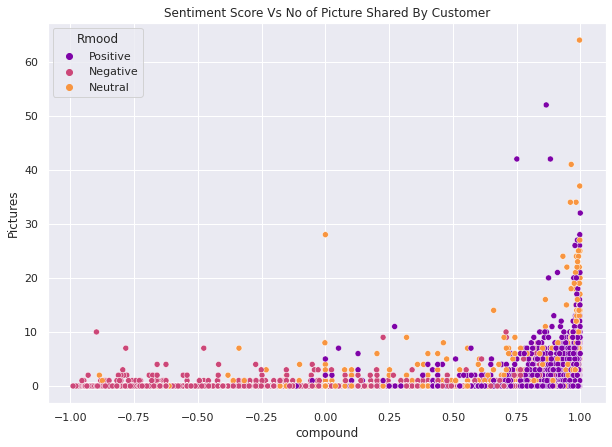

In [433]:
# 'Sentiment polarity Vs No of Picture Shared By Customer'


plt.figure(figsize=(10,7))
sns.scatterplot(x="compound", y="Pictures",
                hue="Rmood", palette="plasma",data=review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

We can clearly see that positive sentiment is directly proportional to people posting pictures. Restaurants should make it a point that the ambience of their surroundings & presentation of food  is picturesque. Maybe experimenting weekly for e.g. exhibiting a unique centrepiece or introducing a weekly/ monthly special will help in pushing customers towards a positive sentiment towards a restaurant and increasing footfall. 


## Analysis of clusters. 

In [434]:
Rating_cost_cluster = {
    2: 'Average Rating Low Cost',
    3: 'High Rating High Cost',
    0: 'Low Rating Low Cost',
    1: 'Average Rating High Cost'
}

review_df['Rating_cost Cluster Name'] = review_df['RC_cluster'].apply(lambda x: Rating_cost_cluster[x])

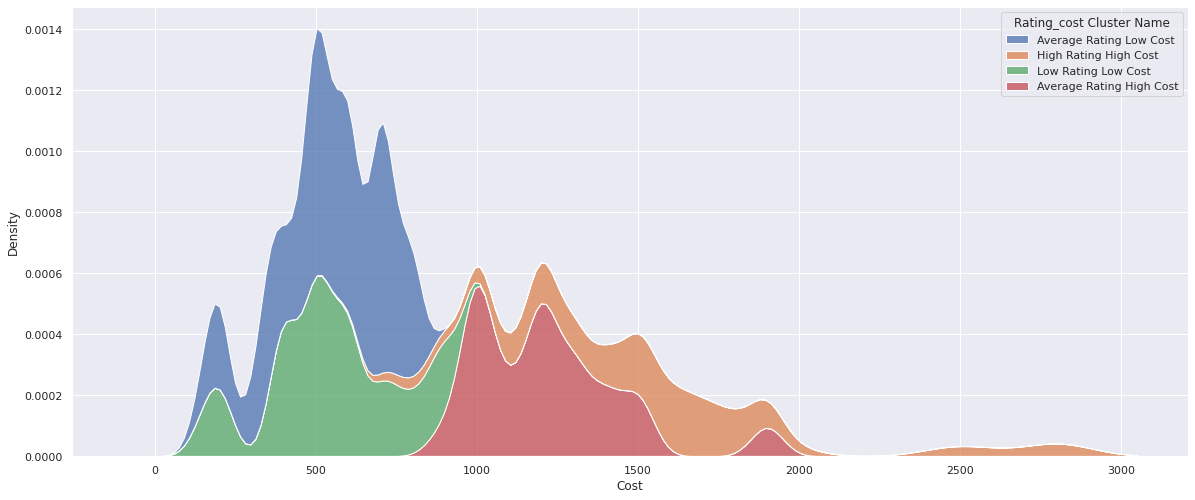

In [435]:
sns.kdeplot(data=review_df, x='Cost', hue='Rating_cost Cluster Name', multiple="stack")


We can see from the graph that average cost above ₹1000 can be considered as expensive. 

Geolocation 

In [436]:
review_df['Geo Cluster Name'].value_counts()

Near Wipro and ISB                                      5285
Old Bombay Rd(between Khajaguda Jn and ORR Jn)          1881
Old Bombay Rd(between ORR junction and ISB Junction)    1214
Name: Geo Cluster Name, dtype: int64

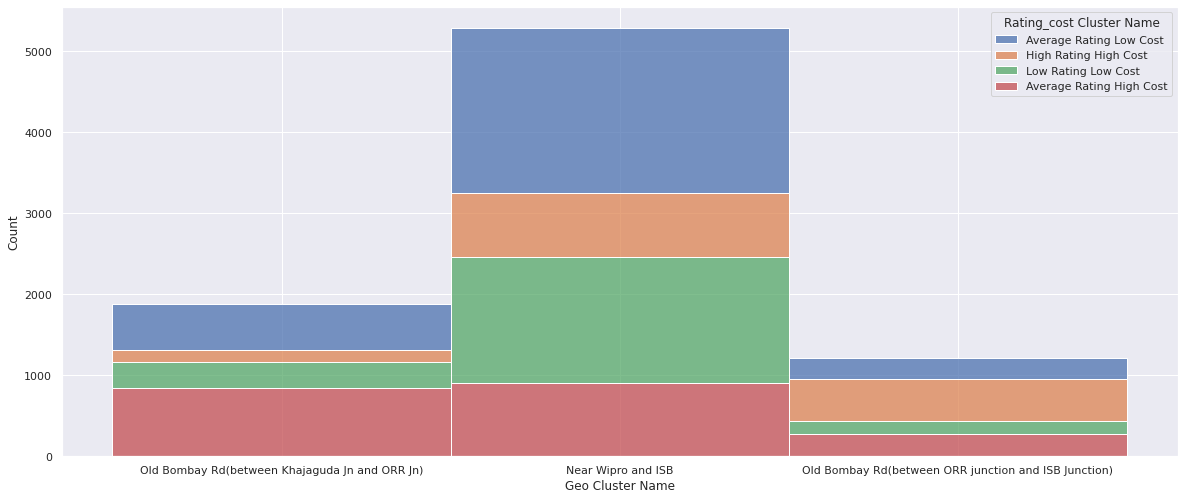

In [437]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.histplot(data=review_df, x='Geo Cluster Name', hue="Rating_cost Cluster Name", multiple="stack")

* Tho we can see a good distribution of all kinds of restuaunts, old bombay road (Between ORR and ISB) has higher percenrage of expensive resturaunts. 




* Most of the restaurants are located in the ORR junction and ISB junction area. 




In [447]:
review_df['Rating_cost Cluster Name'].value_counts()

Average Rating Low Cost     2860
Low Rating Low Cost         2028
Average Rating High Cost    2024
High Rating High Cost       1468
Name: Rating_cost Cluster Name, dtype: int64

Most resturaunts are economical, that is average cost of dining is less than ₹ 1000, and a this cluster can be found near WIPRO and ISB. 

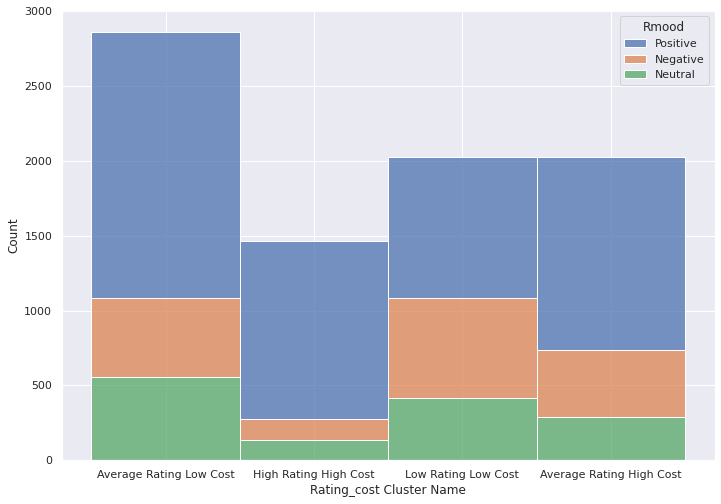

In [439]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=review_df, x='Rating_cost Cluster Name', hue="Rmood", multiple="stack")

As we can see the maximum number of resturaunts come under the average rating low cost bin. 

In [440]:
import warnings
warnings.filterwarnings("ignore")

In [450]:
review_df.dropna().groupby(by ='Geo Cluster Name')['Cost','Rating'].describe()

Cost                 \
                                                     count    mean    std   
Geo Cluster Name                                                            
Near Wipro and ISB                                 5285.00  765.14 423.21   
Old Bombay Rd(between Khajaguda Jn and ORR Jn)     1881.00  950.11 358.89   
Old Bombay Rd(between ORR junction and ISB Junc... 1214.00 1367.30 700.39   

                                                                          \
                                                      min    25%     50%   
Geo Cluster Name                                                           
Near Wipro and ISB                                 150.00 500.00  600.00   
Old Bombay Rd(between Khajaguda Jn and ORR Jn)     300.00 700.00 1000.00   
Old Bombay Rd(between ORR junction and ISB Junc... 400.00 700.00 1500.00   

                                                                    Rating  \
                                                       75%     max   count   
Geo Cluster Name                                                             
Near Wipro and ISB                                 1000.00 1900.00 5285.00   
Old Bombay Rd(between Khajaguda Jn and ORR Jn)     1200.00 1600.00 1881.00   
Old Bombay Rd(between ORR junction and ISB Junc... 1750.00 2800.00 1214.00   

                                                                             \
                                                   mean  std  min  25%  50%   
Geo Cluster Name                                                              
Near Wipro and ISB                                 3.57 1.47 1.00 3.00 4.00   
Old Bombay Rd(between Khajaguda Jn and ORR Jn)     3.63 1.41 1.00 3.00 4.00   
Old Bombay Rd(between ORR junction and ISB Junc... 3.76 1.35 1.00 3.00 4.00   

                                                              
                                                    75%  max  
Geo Cluster Name                                              
Near Wipro and ISB                                 5.00 5.00  
Old Bombay Rd(between Khajaguda Jn and ORR Jn)     5.00 5.00  
Old Bombay Rd(between ORR junction and ISB Junc... 5.00 5.00

In [441]:
review_df.dropna().groupby(by ='Geo Cluster Name')['Cost','Rating'].agg({'Cost':mean,'Rating':mean}).reset_index()


Geo Cluster Name    Cost  Rating
0                                 Near Wipro and ISB  765.14    3.57
1     Old Bombay Rd(between Khajaguda Jn and ORR Jn)  950.11    3.63
2  Old Bombay Rd(between ORR junction and ISB Jun... 1367.30    3.76

1.  **Old Bombay Rd(between Khajaguda Jn and ORR Jn):**  gives maximum cost to benifit.
2.  **Near Wipro and ISB :** has  the maximum number of options that are available. 

In [442]:
review_df.dropna().groupby(by ='Rating_cost Cluster Name')['Cost','Rating'].agg({'Cost':mean,'Rating':mean}).reset_index()


Rating_cost Cluster Name    Cost  Rating
0  Average Rating High Cost 1217.59    3.57
1   Average Rating Low Cost  544.65    3.71
2     High Rating High Cost 1604.77    4.31
3       Low Rating Low Cost  548.77    3.01

#Conclusion 